In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [3]:
visa_df=pd.read_csv(r"C:\Users\gunda\Documents\Documents\Naresh IT\Data Science\Data files\visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [4]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Box Plot**

- Box plot is used to detect outlier

- box plot has min q1 q2 q3 and max value

- Inside box plot red line represents median which 50 percentile data

**Outlier**

- very very huge observation

- which pull the data in any side of the distribution

- Mild outliers

   - q1-1.5*IQR  and q3+1.5*IQR

- Strong outliers

  - q1-3*IQR and q3+3*IQR

- IQR: Inter Quartile Range

  - IQR= Q3-Q1

- q1: 25p

- q2: 50p

- q3: 75p

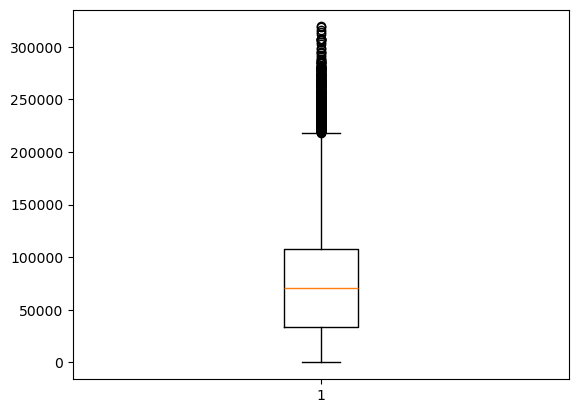

In [5]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

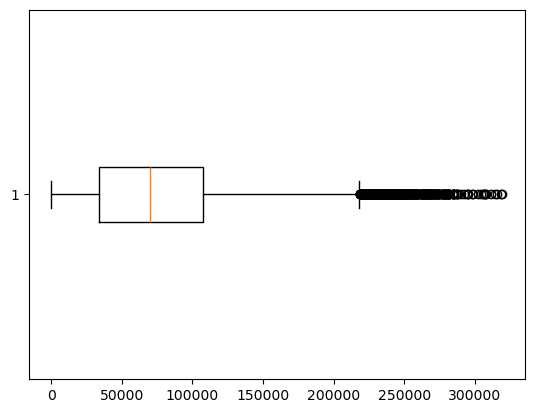

In [14]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

In [9]:
plt.boxplot(visa_df['prevailing_wage'],
           orient=h)

NameError: name 'h' is not defined

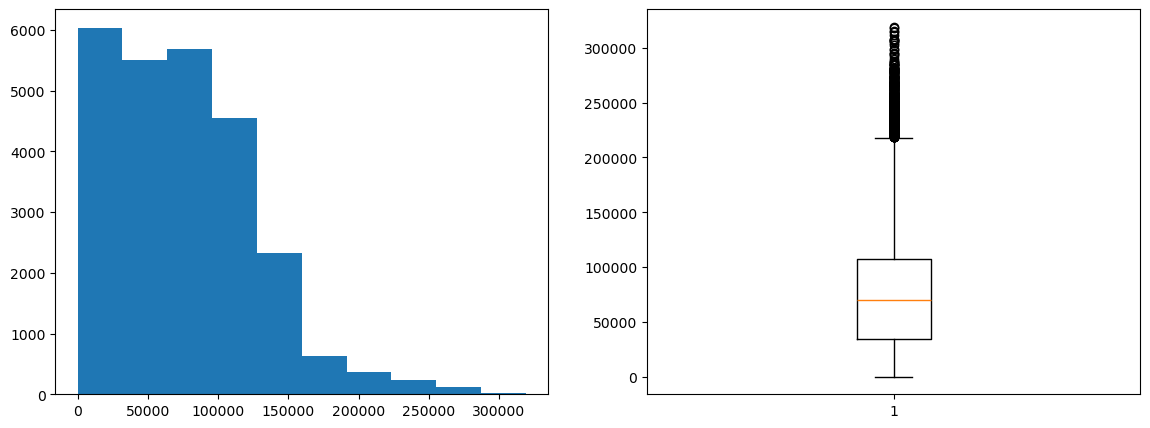

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the Outiers**

- Outliers are available less than q1-1.5*IQR

- Outliers are available greater than q3+1.5*IQR

- Step1:

   - Calculate Q1

   - Calculate Q3

   - Calculate IQR : Q3-Q1

- Step2:

   - LB = Q1-1.5*IQR

   - UB = Q3+1.5*IQR

- Step3: 

   - con1 = visa_df['prevailing_wage']<LB

   - con2 = visa_df['prevailing_wage']>UB

   - Apply or operator and get the outlier data

In [22]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['previaling_wage']<LB
con1=visa_df['previaling_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

KeyError: 'previaling_wage'

In [ ]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['previaling_wage']<LB
con1=visa_df['previaling_wage']>UB
outliers_data=visa_df[con1 & con2]
len(outliers_data)